# Разведочный анализ данных: начало

Обработка датасета о моллюсках тип Abalone - в нем содержатся их различные характеристики, а также размер (целевой признак).

**Цель проекта: Predict the age of abalone from physical measurements**

**В рамках этой части ПРОЕКТА в ноутбуке даются ответы на следующие вопросы:**

* Общее исследование данных: проверить размеры таблицы, число столбцов, количество пропусков в столбцах.

* Однофакторный анализ: по каждому столбцу посмотреть его распределение. Если есть пропуски и ошибочные значения - обработать их. Посмотреть связь с целевой переменной.

* Построить матрицу корреляций (или ее аналог для категориальных признаков): использовать корреляции, тест Хи^2, ANOVA.

* Провести анализ целевой переменной - на какое распределение больше всего похожа ее гистограмма? Какие проблемы в связи с этим могут возникнуть при обучении моделей?

* Увеличить размер данных простым дублированием до 1_000_000 строк в датасете. Провести сравнение скорости работы Pandas и Polars на увеличенном датасете по параметрам:
- загрузка данных
- фильтрация данных
- агрегация данных

[Pandas cheatsheet](https://images.datacamp.com/image/upload/v1676302204/Marketing/Blog/Pandas_Cheat_Sheet.pdf)

## Импорт библиотек и загрузка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ABALONE_DATASET = "https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/abalone.csv"

In [3]:
df = pd.read_csv(ABALONE_DATASET)

## Описание данных

Признаки в датасете:
- Sex - nominal - M, F, and I (infant)
- Length - continuous - mm - Longest shell measurement
- Diameter - continuous - mm - perpendicular to length
- Height - continuous - mm - with meat in shell
- Whole weight - continuous - grams - whole abalone
- Shucked weight - continuous - grams - weight of meat
- Viscera weight - continuous - grams - gut weight (after bleeding)
- Shell weight - continuous - grams - after being dried
- **Rings - integer - +1.5 gives the age in years (target)**

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Исследование данных

Размер датасета

In [5]:
df.shape

(4177, 9)

Информация о типах данных и пропусках

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


**ВЫВОД 1: в исходном датасете имеются пропуски: признаки - Diameter и Whole weight**

Основные числовые характеристики

In [7]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4078.000000,4177.000000,4078.000000,4177.000000,4177.000000,4127.000000,4177.000000
mean,0.523992,0.407840,0.139516,0.827306,0.359367,0.180594,0.239072,9.933684
std,0.120093,0.099286,0.041827,0.490348,0.221963,0.109614,0.138942,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.440500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,9.000000
75%,0.615000,0.480000,0.165000,1.150875,0.502000,0.253000,0.328250,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [8]:
df.describe(include='object')

,Sex
count,4177
unique,4
top,M
freq,1447


In [9]:
df.Sex.value_counts()

M    1447
I    1276
F    1259
f     195
Name: Sex, dtype: int64

**Делаем замену очевидной ошибки: меняем f на F**

In [10]:
df['Sex'] = df['Sex'].replace('f', 'F')

In [11]:
df.Sex.value_counts()

F    1454
M    1447
I    1276
Name: Sex, dtype: int64

In [12]:
df.describe(include='all')

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177,4177.000000,4078.000000,4177.000000,4078.000000,4177.000000,4177.000000,4127.000000,4177.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407840,0.139516,0.827306,0.359367,0.180594,0.239072,9.933684
std,NaN,0.120093,0.099286,0.041827,0.490348,0.221963,0.109614,0.138942,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,NaN,0.450000,0.350000,0.115000,0.440500,0.186000,0.093500,0.130000,8.000000
50%,NaN,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,9.000000
75%,NaN,0.615000,0.480000,0.165000,1.150875,0.502000,0.253000,0.328250,11.000000


**В каждом числовом признаке есть некорректные данные либо пропуски. Требуется их корректировка либо удаление - признаки Diameter, Whole weight, Shell weight**

In [13]:
df.Diameter.isna().sum()

99

In [14]:
df['Whole weight'].isna().sum()

99

In [15]:
df['Shell weight'].isna().sum()

50

In [16]:
df.duplicated().sum()

0

In [17]:
df[df.duplicated()]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [18]:
df.drop_duplicates(inplace=True)

df.shape

(4177, 9)

In [19]:
df.reset_index(inplace=True, drop=True)

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Работа с пропущенными значениями

Стратегии заполнения пропусков:

* если пропусков очень мало (~меньше процента) - строки с пропусками можно удалить или заполнить средним/медианой

* если пропусков мало (~5-10%) - их можно заполнить (средним, медианой, уникальным значением, самым популярным значением, спрогнозировать)

* если пропусков много - можно удалить столбец

* можно пытаться предсказывать пропуски моделью

In [20]:
df.isnull().mean() * 100

Sex               0.000000
Length            0.000000
Diameter          2.370122
Height            0.000000
Whole weight      2.370122
Shucked weight    0.000000
Viscera weight    0.000000
Shell weight      1.197031
Rings             0.000000
dtype: float64

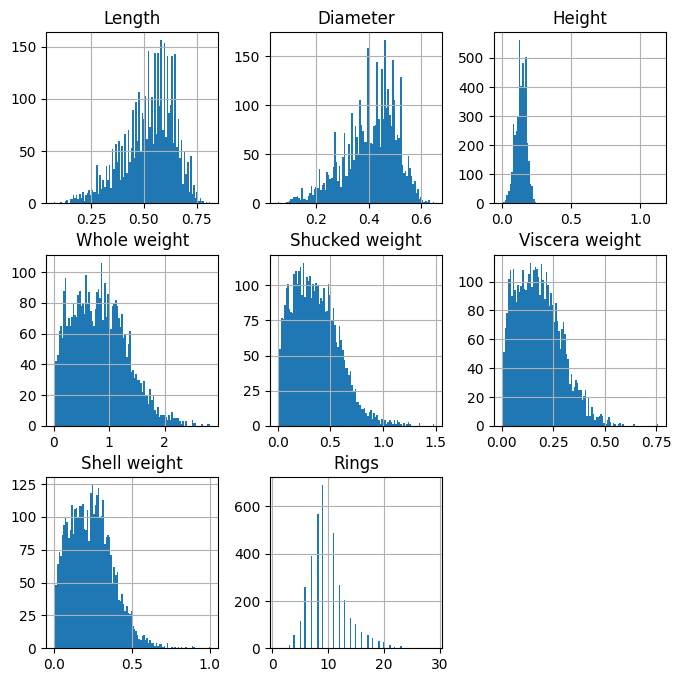

In [21]:
df.hist(bins=100, figsize=(8,8));

In [22]:
median_diameter = df['Diameter'].median()

df['Diameter'].fillna(median_diameter, inplace=True)

In [23]:
median_whole_weight = df['Whole weight'].median()

df['Whole weight'].fillna(median_whole_weight, inplace=True)

In [24]:
median_shell_weight = df['Shell weight'].median()

df['Shell weight'].fillna(median_shell_weight, inplace=True)

Проверим распределение признаков после заполнения пропусков медианным значением:

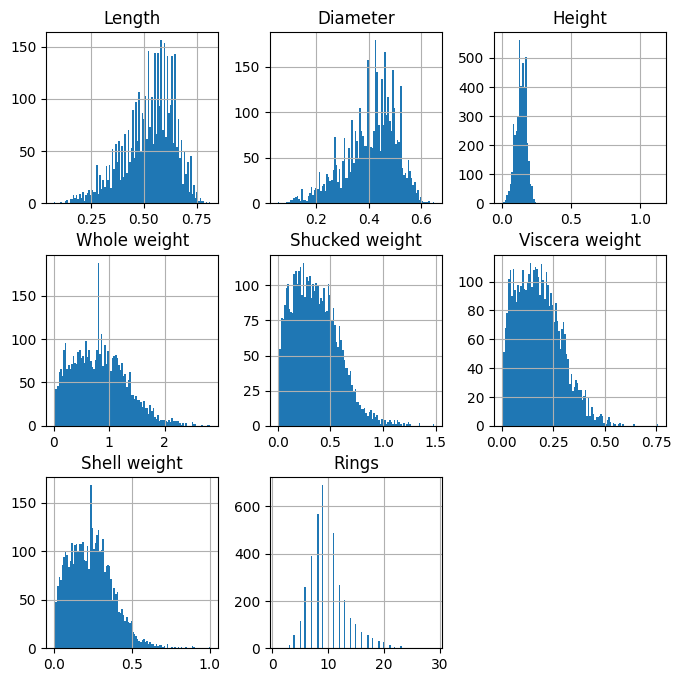

In [25]:
df.hist(bins=100, figsize=(8,8));

**Вывод 5: добавить**

## Однофакторный анализ

### Геометрические признаки: длина, диаметр, высота

Выделены три признака, характеризующие геометрические размеры моллюска:
* Length
* Diameter
* Height

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


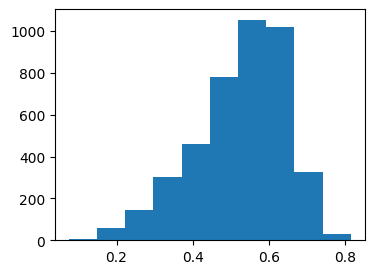

In [27]:
plt.figure(figsize=(4,3))

plt.hist(df.Length);

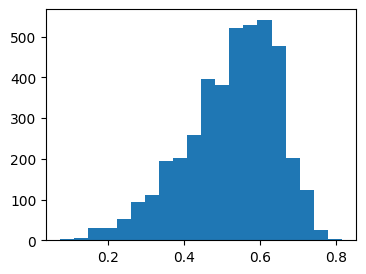

In [28]:
plt.figure(figsize=(4,3))

plt.hist(df.Length, bins=20);

Какую длину имеет самый маленький моллюск в датасете? А самый большой моллюск?

In [29]:
df.Length.min(), df.Length.max()

(0.075, 0.815)

Сколько моллюсков малой длины в исходном датасете?

In [30]:
len(df[df.Length < 0.6])

2874

Сколько процентов моллюсков среди всего датасета - большой длины?

In [31]:
round(100 * len(df[df.Length >= 0.6]) / len(df),2)

31.19

Посмотрим как Length (Длина) влияет на Rings (Возраст) моллюска

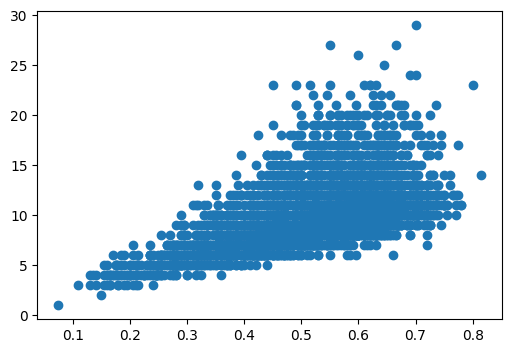

In [32]:
plt.figure(figsize=(6,4))

plt.scatter(df.Length, df.Rings);

In [33]:
round(np.corrcoef(df.Length, df.Rings)[0][1],2)

0.56

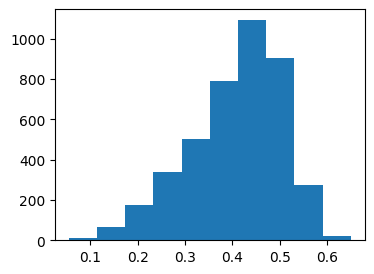

In [34]:
plt.figure(figsize=(4,3))

plt.hist(df.Diameter);

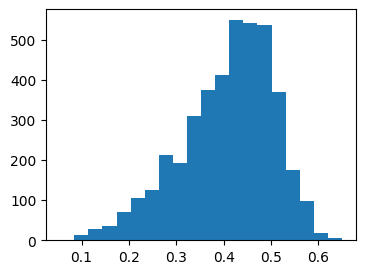

In [35]:
plt.figure(figsize=(4,3))

plt.hist(df.Diameter, bins=20);

Какой диаметр имеет самый маленький моллюск в датасете? А самый большой моллюск?

In [36]:
df.Diameter.min(), df.Diameter.max()

(0.055, 0.65)

Сколько моллюсков малого диаметра в исходном датасете?

In [37]:
len(df[df.Diameter < 0.45])

2489

Сколько процентов моллюсков среди всего датасета - большого диаметра?

In [38]:
round(100 * len(df[df.Diameter >= 0.45]) / len(df),2)

40.41

Посмотрим как Diameter (Диаметр) влияет на Rings (Возраст) моллюска

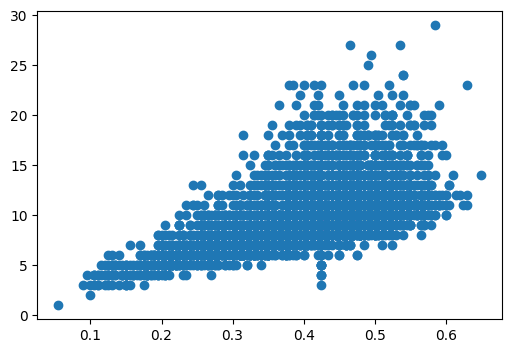

In [39]:
plt.figure(figsize=(6,4))

plt.scatter(df.Diameter, df.Rings);

In [40]:
round(np.corrcoef(df.Diameter, df.Rings)[0][1],2)

0.56

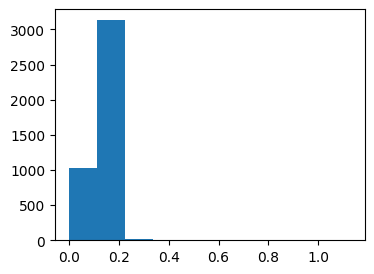

In [41]:
plt.figure(figsize=(4,3))

plt.hist(df.Height);

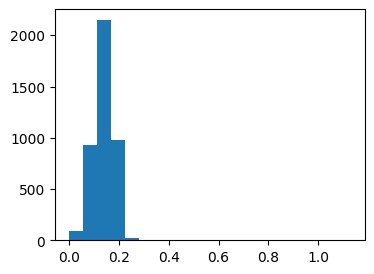

In [42]:
plt.figure(figsize=(4,3))

plt.hist(df.Height, bins=20);

Какую высоту имеет самый маленький моллюск в датасете? А самый большой моллюск?

In [43]:
df.Height.min(), df.Height.max()

(0.0, 1.13)

Сколько моллюсков малой высоты в исходном датасете?

In [44]:
len(df[df.Height < 0.15])

2287

Сколько процентов моллюсков среди всего датасета - большой высоты?

In [45]:
round(100 * len(df[df.Height >= 0.15]) / len(df),2)

45.25

Посмотрим как Height (Высота) влияет на Rings (Возраст) моллюска

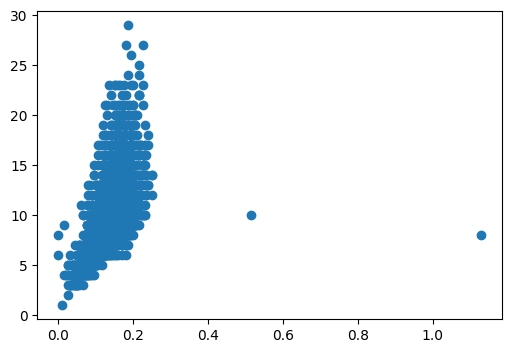

In [46]:
plt.figure(figsize=(6,4))

plt.scatter(df.Height, df.Rings);

In [47]:
round(np.corrcoef(df.Height, df.Rings)[0][1],2)

0.56

In [48]:
len(df[df.Height > 0.4])

2

**ВЫВОД: в исходном датасете имеются два объекта с значением признака Height > 0.4. Эти объекты похожи на выбросы в измерениях. Скорее всего, они будут влиять на точность модели.**

### Весовые признаки: общий вес, вес мяса, вес внутренностей, вес раковины

- Whole weight - continuous - grams - whole abalone
- Shucked weight - continuous - grams - weight of meat
- Viscera weight - continuous - grams - gut weight (after bleeding)
- Shell weight - continuous - grams - after being dried

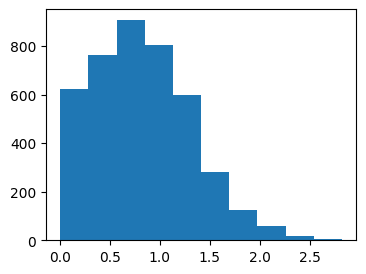

In [49]:
plt.figure(figsize=(4,3))

plt.hist(df['Whole weight']);

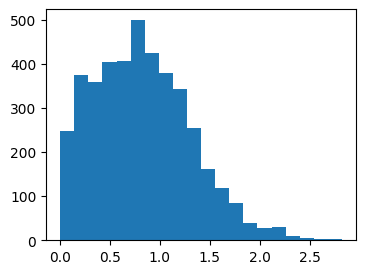

In [50]:
plt.figure(figsize=(4,3))

plt.hist(df['Whole weight'], bins=20);

Какой общий вес имеет самый маленький моллюск в датасете? А самый большой моллюск?

In [51]:
df['Whole weight'].min(), df['Whole weight'].max()

(0.002, 2.8255)

Сколько моллюсков малого общего веса в исходном датасете?

In [52]:
len(df[df['Whole weight'] < 0.75])

1895

Сколько процентов моллюсков среди всего датасета - большой общий вес?

In [53]:
round(100 * len(df[df['Whole weight'] >= 0.75]) / len(df),2)

54.63

Посмотрим как Whole Weight (Общий Вес) влияет на Rings (Возраст) моллюска

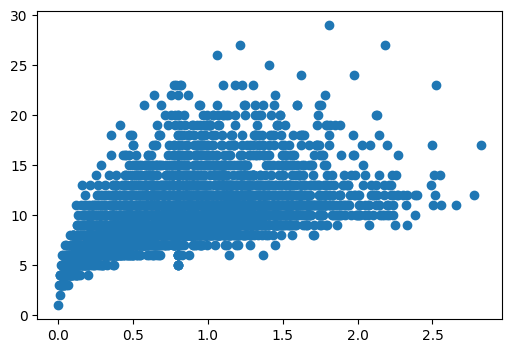

In [54]:
plt.figure(figsize=(6,4))

plt.scatter(df['Whole weight'], df.Rings);

In [55]:
round(np.corrcoef(df['Whole weight'], df.Rings)[0][1],2)

0.53

**ВЫВОД: Whole Weight (Общий Вес) - не имеет выбросов; в зависимости от возраста наблюдается нелинейный характер зависимости между Whole Weight (Общий Вес) и Rings (Возрастом). Корреляция составляет 0.53 по Пирсону**

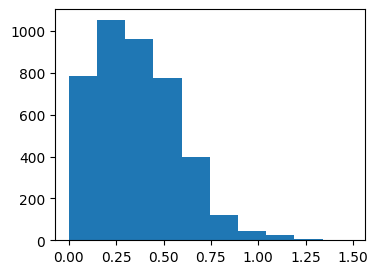

In [56]:
plt.figure(figsize=(4,3))

plt.hist(df['Shucked weight']);

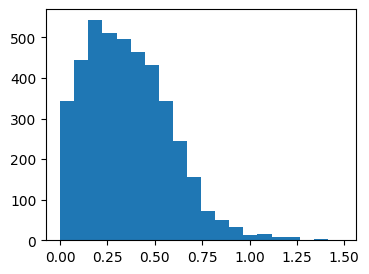

In [57]:
plt.figure(figsize=(4,3))

plt.hist(df['Shucked weight'], bins=20);

Какой вес мяса имеет самый маленький моллюск в датасете? А самый большой моллюск?

In [58]:
df['Shucked weight'].min(), df['Shucked weight'].max()

(0.001, 1.488)

Сколько моллюсков малого веса мяса в исходном датасете?

In [59]:
len(df[df['Shucked weight'] < 0.25])

1503

Сколько процентов моллюсков среди всего датасета - большой вес мяса?

In [60]:
round(100 * len(df[df['Shucked weight'] >= 0.25]) / len(df),2)

64.02

Посмотрим как Shucked weight (Вес мяса) влияет на Rings (Возраст) моллюска

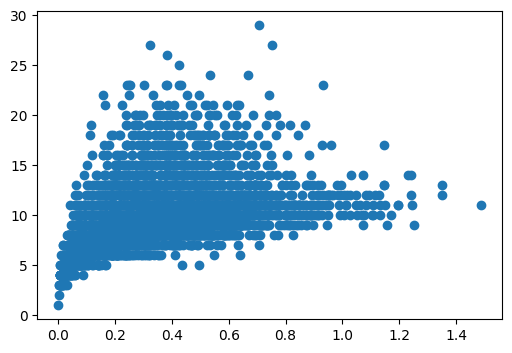

In [61]:
plt.figure(figsize=(6,4))

plt.scatter(df['Shucked weight'], df.Rings);

In [62]:
round(np.corrcoef(df['Shucked weight'], df.Rings)[0][1],2)

0.42

**ВЫВОД: Shucked weight (Вес мяса) - не имеет выбросов; в зависимости от возраста наблюдается нелинейный характер зависимости между Shucked weight (Вес мяса) и Rings (Возрастом). Но корреляция между признаком и целевым параметром не высокая 0.42 по Пирсону**

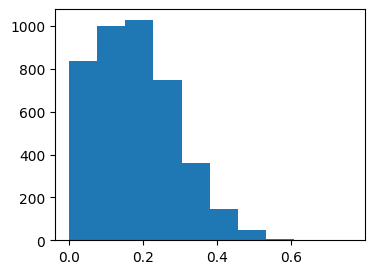

In [63]:
plt.figure(figsize=(4,3))

plt.hist(df['Viscera weight']);

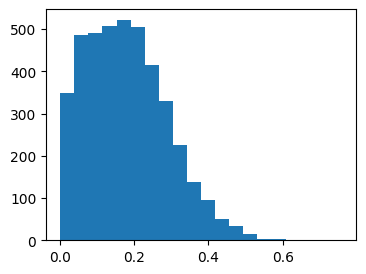

In [64]:
plt.figure(figsize=(4,3))

plt.hist(df['Viscera weight'], bins=20);

Какой вес внутренностей имеет самый маленький моллюск в датасете? А самый большой моллюск?

In [65]:
df['Viscera weight'].min(), df['Viscera weight'].max()

(0.0005, 0.76)

Сколько моллюсков малого веса внутренностей в исходном датасете?

In [66]:
len(df[df['Viscera weight'] < 0.15])

1798

Сколько процентов моллюсков среди всего датасета - большой вес внутренностей?

In [67]:
round(100 * len(df[df['Viscera weight'] >= 0.15]) / len(df),2)

56.95

Посмотрим как Viscera weight (Вес внутренностей) влияет на Rings (Возраст) моллюска

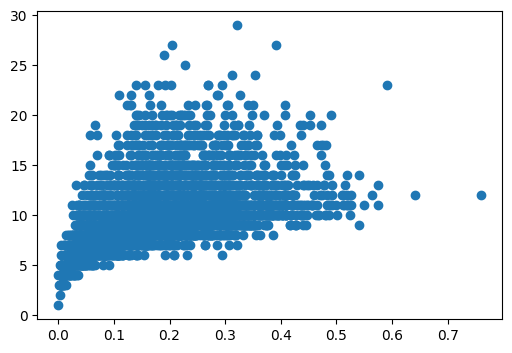

In [68]:
plt.figure(figsize=(6,4))

plt.scatter(df['Viscera weight'], df.Rings);

In [69]:
round(np.corrcoef(df['Viscera weight'], df.Rings)[0][1],2)

0.5

**ВЫВОД: Viscera weight (Вес внутренностей) - не имеет практически выбросов: есть два объекта с значением веса более 0.6, которые могут повлиять на точность модели; в зависимости от возраста наблюдается нелинейный характер зависимости между Viscera weight (Вес внутренностей) и Rings (Возрастом). Корреляция между признаком и целевым параметром не высокая - 0.5 по Пирсону**

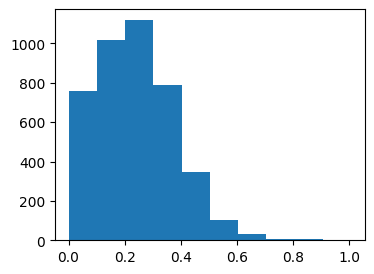

In [70]:
plt.figure(figsize=(4,3))

plt.hist(df['Shell weight']);

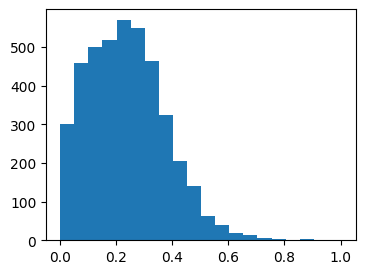

In [71]:
plt.figure(figsize=(4,3))

plt.hist(df['Shell weight'], bins=20);

Какой вес раковины имеет самый маленький моллюск в датасете? А самый большой моллюск?

In [72]:
df['Shell weight'].min(), df['Shell weight'].max()

(0.0015, 1.005)

Сколько моллюсков малого веса раковины в исходном датасете?

In [73]:
len(df[df['Shell weight'] < 0.20])

1744

Сколько процентов моллюсков среди всего датасета - большой вес раковины?

In [74]:
round(100 * len(df[df['Shell weight'] >= 0.20]) / len(df),2)

58.25

Посмотрим как Shell weight (Вес раковины) влияет на Rings (Возраст) моллюска

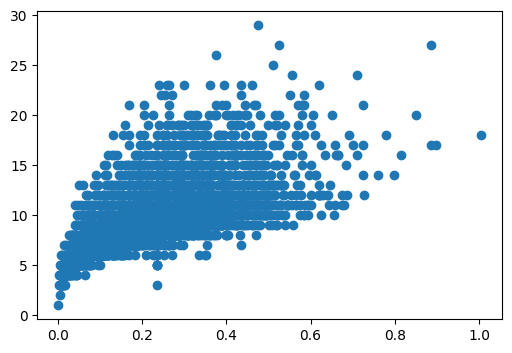

In [75]:
plt.figure(figsize=(6,4))

plt.scatter(df['Shell weight'], df.Rings);

In [76]:
round(np.corrcoef(df['Shell weight'], df.Rings)[0][1],2)

0.62

**ВЫВОД: Shell weight (Вес раковины) - не имеет практически выбросов; в зависимости от возраста наблюдается нелинейный характер зависимости между Shell weight (Вес раковины) и Rings (Возрастом). При этом корреляция между признаком и целевым параметром достаточно высокая - 0.62 по Пирсону**

## Взаимозависимость в данных

### Корреляция по Пирсону

**Корреляция Пирсона**

pearson.svg

Корреляция Пирсона - это мера линейной взаимосвязи двух числовых столбцов.

* $r$	=	correlation coefficient
* $x_{i}$	=	values of the x-variable in a sample
* $\bar{x}$	=	mean of the values of the x-variable
* $y_{i}$	=	values of the y-variable in a sample
* $\bar{y}$	=	mean of the values of the y-variable

<ipython-input-77-ecf4a780db2d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

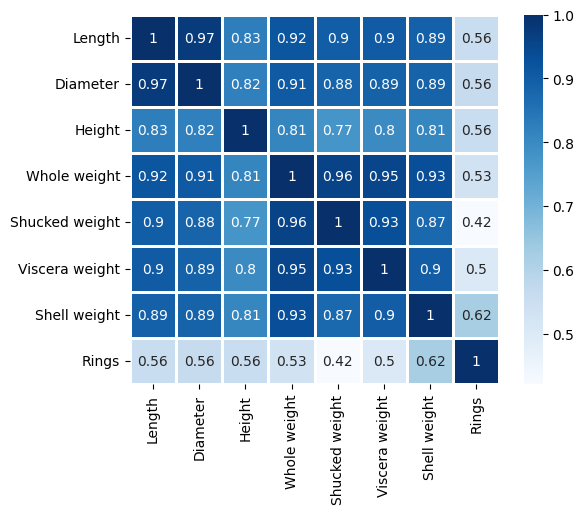

In [77]:
corr = df.corr()

sns.heatmap(corr, cmap="Blues", annot=True, linewidths = 1, square= True)

**ВЫВОД: корреляция Пирсона показывает, что каждый из признаков примерно одинаково влияет на целевую переменную. Исключение, пожалуй, составляет признак Shucked weight (0.42). Наибольший коэффициент корреляции имеет признак Shell weight (0.62)**

### Корреляция по Спирмену

**Корреляция Спирмена**

Коэффициент корреляции Спирмена основан на ранжировании значений переменных и измеряет степень монотонной связи между ними.

Значение коэффициента корреляции Спирмена лежит в диапазоне от -1 до 1. Значение -1 означает полную отрицательную связь (чем больше одна переменная, тем меньше другая), значение 1 означает положительную связь (чем больше одна переменная, тем больше другая), а значение 0 означает отсутствие связи между переменными.

Можно использовать для порядковых переменных!

spearman.svg

* $\rho$	=	Spearman's rank correlation coefficient
* $d_{i}$	=	difference between the two ranks of each observation
* $n$	=	number of observations

[Пример расчета коэффициента корреляции Спирмена](https://statpsy.ru/spearman/primer-raschet-spearman/)

<ipython-input-78-422c658e06d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='spearman')


<Axes: >

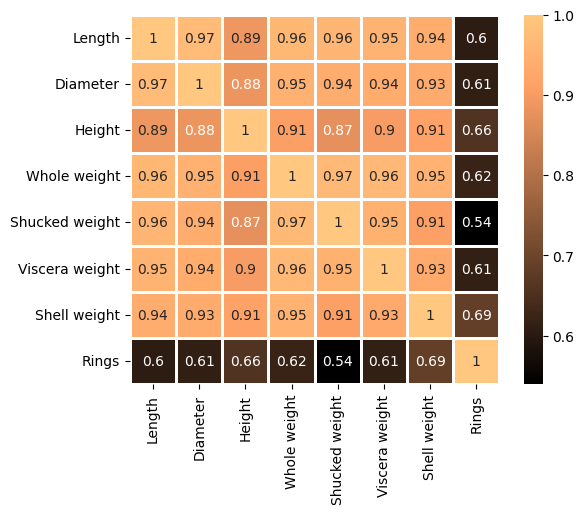

In [78]:
corr = df.corr(method='spearman')

sns.heatmap(corr, cmap="copper", annot=True, linewidths = 1, square= True)

**ВЫВОД: корреляция Спирмена дает результат аналогичный корреляции Пирсона. Значения корреляции каждого признака увеличились, но их вклад в целевую переменную не изменился: признак Shucked weight делает минимальный вклад (0.54). Наибольший коэффициент корреляции имеет признак Shell weight (0.69)**

**Корреляция Кендалла**

Чаще используется для пары номинальный - номинальный признак.

Похожа на корреляцию Спирмена.

### Корреляция по Кенделлу

Вычислите матрицу корреляций, используя корреляцию Кендалла.

С каким столбцом коррелирует в этой матрице `depth` больше всего?

<ipython-input-79-cfdea4c5f5db>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='kendall')


<Axes: >

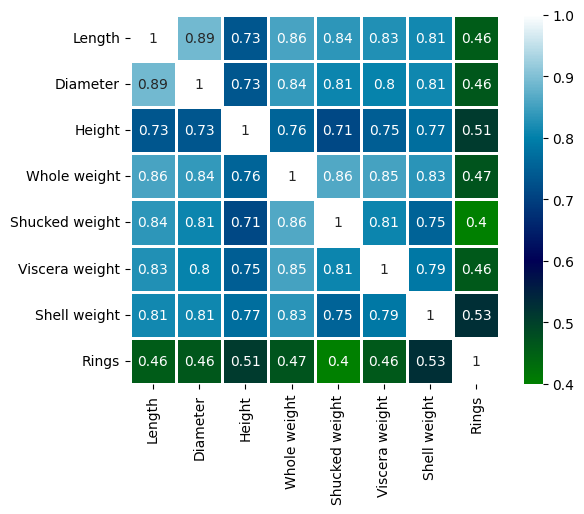

In [79]:
# your code here
corr = df.corr(method='kendall')

sns.heatmap(corr, cmap="ocean", annot=True, linewidths = 1, square= True)

**ВЫВОД: корреляция Кенделла дает результат аналогичный корреляции Пирсона и Спирмена. Значения корреляции каждого признака уменьшились, но их вклад в целевую переменную не изменился: признак Shucked weight делает минимальный вклад (0.4). Наибольший коэффициент корреляции имеет признак Shell weight (0.53)**

### V-мера Крамера

*Для измерения связи между Категориальным - Категориальным признаком*

Для оценки степени взаимосвязи категориальных столбцов можно вычислять V-меру Крамера.
Это вариант нормировки статистики $\chi^2$. Статистика $\chi^2$ - это функция, измеряющая меру взаимосвязи двух категориальных переменных.

Пусть $X, Y$ - две категориальных переменных, тогда $\chi^2$ вычисляется по формуле

$$\chi^2(X,Y)=\sum_{i,j}\frac{(O_{ij}-E_{ij})^2}{E_{ij}},$$

где $O_{ij}$ - наблюдаемая частота события, $E_{ij}$ - ожидаемая частота события (в предположении, что величины $X$ и $Y$ независимы).

Чем больше значение $\chi^2$ - тем больше степень взаимосвязи переменных $X$ и $Y$.



**Покажем на примере.**

Изучим по некоторым данным зависимость факта курения и повышенного давления. По данным составим таблицу сопряженности.

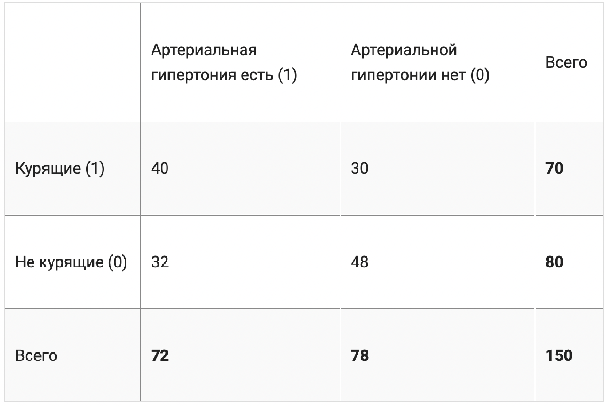

Вычисляем $\chi^2$:

$O_{11} = 40$

$E_{11} = 70 * 72 / 150 \approx 33.6 $ (так считается $E_{ij}$, если величины независимы)

Аналогично вычисляются оставшиеся слагаемые в формуле. Получаем

$\chi^2(X,Y) = (40-33.6)^2/33.6 + (30-36.4)^2/36.4 + (32-38.4)^2/38.4 + (48-41.6)^2/41.6 = 4.396$



Чем больше $\chi^2$, тем больше взаимосвязь между признаками.

В случае, если признаки независимы, то ожидаемая и наблюдаемая частоты совпадут, и $\chi^2=0$.



V-мера Крамера - это нормировка $\chi^2$ на число значений в каждой категории:

$$V = \sqrt{\frac{\chi^2/n}{min(k-1,r-1)}},$$

где


$n$ - общее число наблюдений

$k$ - число категорий в $X$

$r$ - число категорий в $Y$


В результате этой нормировки V-мера находится на отрезке от 0 до 1 и легко интерпретируется: *чем больше V-мера - тем больше зависимость между двумя переменными, и наоборот.*

In [80]:
!pip install association-metrics -q

  Preparing metadata (setup.py) ... done


In [81]:
import association_metrics as am

df_cat = df.apply(lambda x: x.astype("category") if x.dtype == "object" else x)

cramersv = am.CramersV(df_cat)

cramersv.fit()

,Sex
Sex,1.0


**ВЫВОД: в исходном датасете один категориальный признак. Если искусственно не добавлять категориальные признаки, то взаимосвязь существующего категориального признака будет только с самим собой.**

### ANOVA

*Для измерения связи между Числовым - Категориальным признаком*

NOVA (англ. Analysis of Variance) - это статистический метод, используемый для сравнения средних значений между тремя и более группами. ANOVA анализирует различия между средними значениями внутри групп и между группами, чтобы определить, есть ли статистически значимые различия между ними.

ANOVA основан на предположении, что переменная, которая анализируется, является нормально распределенной в каждой группе, и что дисперсия внутри групп равномерна. В результате, ANOVA проверяет, насколько различны средние значения между группами по сравнению со случайной вариацией внутри групп.

ANOVA производит F-тест, который сравнивает дисперсию между группами с дисперсией внутри групп. Если различия между группами значительны по сравнению со случайной вариацией внутри групп, то F-тест покажет статистически значимый результат, указывающий на наличие различий между группами.

In [ ]:
# Generating sample data
import pandas as pd
ColumnNames=['FuelType','CarPrice']
DataValues= [
             [  'Petrol',   2000],
             [  'Petrol',   2100],
             [  'Petrol',   1900],
             [  'Petrol',   2150],
             [  'Petrol',   2100],
             [  'Petrol',   2200],
             [  'Petrol',   1950],
             [  'Diesel',   2500],
             [  'Diesel',   2700],
             [  'Diesel',   2900],
             [  'Diesel',   2850],
             [  'Diesel',   2600],
             [  'Diesel',   2500],
             [  'Diesel',   2700],
             [  'CNG',   1500],
             [  'CNG',   1400],
             [  'CNG',   1600],
             [  'CNG',   1650],
             [  'CNG',   1600],
             [  'CNG',   1500],
             [  'CNG',   1500]
           ]
#Create the Data Frame
CarData=pd.DataFrame(data=DataValues,columns=ColumnNames)

########################################################
# f_oneway() function takes the group data as input and
# returns F-statistic and P-value

from scipy.stats import f_oneway

# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list

CategoryGroupLists = CarData.groupby('FuelType')['CarPrice'].apply(list)

# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value >= 0.05

AnovaResults = f_oneway(*CategoryGroupLists)

print('P-Value for Anova is: ', AnovaResults[1])

if AnovaResults[1] >= 0.05:
    print('Features are NOT correlated')
else:
    print('Features are correlated')

P-Value for Anova is:  4.3558466424602e-12
Features are correlated


In [82]:
from scipy.stats import f_oneway

Data = []

for c1 in df.columns:
    for c2 in df.columns:
        if df[c1].dtype == 'object' and df[c2].dtype != 'object':
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,Sex,Length,Yes
1,Sex,Diameter,Yes
2,Sex,Height,Yes
3,Sex,Whole weight,Yes
4,Sex,Shucked weight,Yes
5,Sex,Viscera weight,Yes
6,Sex,Shell weight,Yes
7,Sex,Rings,Yes


**ВЫВОД: наблюдается корреляция между категориальным признаком Sex и каждым из числовых признаков, имеющихся в исходном датасете. Скорее всего, в зависимости от признака Sex меняется и продолжительность жизни, т.е. возраст моллюска.**

## Polars

В конце 2020 года в python стала доступна библиотека Polars.

Polars - это высокопроизводительная библиотека для манипуляции и анализа данных в Python и Rust. Она была создана как альтернатива Pandas, но с учетом возможностей параллельной обработки данных на многопроцессорных системах.

Одним из основных преимуществ Polars является его скорость работы с данными. Polars использует многопоточную обработку данных, что позволяет обрабатывать большие объемы данных на многопроцессорных системах в несколько раз быстрее, чем Pandas. Кроме того, Polars имеет более эффективную систему памяти, что позволяет работать с данными, которые не помещаются в оперативной памяти.


Хорошая [статья про сравнение Pandas и Polars](https://vc.ru/u/1389654-machine-learning/583603-pandas-vs-polars-sravnenie-sintaksisa-i-skorosti)

In [83]:
df_big = df.copy()

for i in range(250):
  df_big = pd.concat([df_big, df])

df_big.to_csv("abalone.csv", index=False)

In [84]:
df_big.shape, df.shape

((1048427, 9), (4177, 9))

In [85]:
!pip install polars

import polars as pl

print(pl.__version__)

0.17.3


### Загрузка данных

In [86]:
%%time

df_pl = pl.read_csv("abalone.csv")

CPU times: user 797 ms, sys: 147 ms, total: 944 ms
Wall time: 658 ms


In [87]:
%%time

df = pd.read_csv("abalone.csv")

CPU times: user 831 ms, sys: 78.7 ms, total: 909 ms
Wall time: 932 ms


**ВЫВОД: при загрузке датасета размером 1048427 объектов библиотека Polaris быстрее выполняет загрузку датасета**

### Выбор и фильтрация данных

In [88]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.7985,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [89]:
%%time

df[['Length', 'Rings']]

CPU times: user 9.88 ms, sys: 0 ns, total: 9.88 ms
Wall time: 28.8 ms


,Length,Rings
0,0.455,15
1,0.350,7
2,0.530,9
3,0.440,10
4,0.330,7
...,...,...
1048422,0.565,11
1048423,0.590,10
1048424,0.600,9
1048425,0.625,10


In [90]:
%%time

df_pl[['Length', 'Rings']]
# df_pl.select(pl.col(['Length', 'Rings']))

CPU times: user 782 µs, sys: 958 µs, total: 1.74 ms
Wall time: 19.5 ms


Length,Rings
f64,i64
0.455,15
0.35,7
0.53,9
0.44,10
0.33,7
0.425,8
0.53,20
0.545,16
0.475,9


**ВЫВОД: при выборе двух признаков из датасета размером 1048427 объектов библиотека Polaris быстрее выполняет срез данных**

In [91]:
# Pandas
%%time

df.query('Length < 0.6')

CPU times: user 73.5 ms, sys: 1.49 ms, total: 75 ms
Wall time: 97.1 ms


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.7985,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
1048419,M,0.520,0.385,0.165,0.7910,0.3750,0.1800,0.1815,10
1048420,M,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405,10
1048421,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8
1048422,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11


In [92]:
# Polars
%%time

df_pl.filter(pl.col('Length') < 0.6)

CPU times: user 36.2 ms, sys: 46.3 ms, total: 82.5 ms
Wall time: 64.7 ms


Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""M""",0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
"""M""",0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
"""F""",0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
"""M""",0.44,0.365,0.125,0.7985,0.2155,0.114,0.155,10
"""I""",0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7
"""I""",0.425,0.3,0.095,0.3515,0.141,0.0775,0.12,8
"""F""",0.53,0.415,0.15,0.7775,0.237,0.1415,0.33,20
"""F""",0.545,0.425,0.125,0.768,0.294,0.1495,0.26,16
"""M""",0.475,0.37,0.125,0.5095,0.2165,0.1125,0.165,9


**ВЫВОД: при фильтрации по условию из датасета размером 1048427 объектов библиотека Polaris вновь срабатывает быстрее, чем Pandas**

### Фильтрация. Продолжение.

С помощью polars и pandas отфильтруйте таблицу, оставив в ней только строки, удовлетворяющие условиям:
* `Sex` = "M"
* `Rings` > 5

Сравните время выполнения запросов

In [93]:
# Pandas
%%time

df.query('Sex == "M"' and 'Rings > 5')

CPU times: user 49.7 ms, sys: 27.7 ms, total: 77.5 ms
Wall time: 80.3 ms


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.7985,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
1048422,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
1048423,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
1048424,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
1048425,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [94]:
# Polars
%%time

df_pl.filter((pl.col('Sex') == "M") & (pl.col('Rings') > 5))

CPU times: user 49.8 ms, sys: 17.7 ms, total: 67.5 ms
Wall time: 48.5 ms


Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""M""",0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
"""M""",0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
"""M""",0.44,0.365,0.125,0.7985,0.2155,0.114,0.155,10
"""M""",0.475,0.37,0.125,0.5095,0.2165,0.1125,0.165,9
"""M""",0.43,0.35,0.11,0.406,0.1675,0.081,0.135,10
"""M""",0.49,0.38,0.135,0.5415,0.2175,0.095,0.19,11
"""M""",0.5,0.4,0.13,0.6645,0.258,0.133,0.24,12
"""M""",0.365,0.295,0.08,0.2555,0.097,0.043,0.1,7
"""M""",0.45,0.32,0.1,0.381,0.1705,0.075,0.115,9


**ВЫВОД: при фильтрации по двум условиям из датасета размером 1048427 объектов библиотека Polaris вновь срабатывает быстрее, чем Pandas**

### Агрегация данных

In [95]:
df_pl.head()

Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""M""",0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
"""M""",0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
"""F""",0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
"""M""",0.44,0.365,0.125,0.7985,0.2155,0.114,0.155,10
"""I""",0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7


In [97]:
%%time

df.groupby('Sex').agg({'Length' : 'mean', 'Rings' : 'max'})

CPU times: user 84.2 ms, sys: 12.1 ms, total: 96.3 ms
Wall time: 105 ms


,Length,Rings
Sex,,
F,0.572978,29
I,0.427273,21
M,0.560059,27


In [98]:
%%time

df_pl.groupby('Sex').agg([pl.mean('Length'), pl.max('Rings')])

CPU times: user 75.1 ms, sys: 10.7 ms, total: 85.8 ms
Wall time: 89.7 ms


Sex,Length,Rings
str,f64,i64
"""F""",0.572978,29
"""I""",0.427273,21
"""M""",0.560059,27


**ВЫВОД: при агрегации датасета размером 1048427 объектов библиотека Polaris вновь срабатывает быстрее, чем Pandas**

In [99]:
# lazy operations
%%time

q = (
    df_pl
    .lazy()
    .groupby(by='Sex')
    .agg(
        [
            pl.col('Length').mean(),
            pl.col('Rings').max()
        ]
    )
)

CPU times: user 274 µs, sys: 28 µs, total: 302 µs
Wall time: 311 µs


In [100]:
%%time

q.collect()

CPU times: user 78.1 ms, sys: 573 µs, total: 78.6 ms
Wall time: 70.9 ms


Sex,Length,Rings
str,f64,i64
"""M""",0.560059,27
"""I""",0.427273,21
"""F""",0.572978,29


### Агрегация. Продолжение.

Для каждого пола (`Sex`) вычислите медианный возраст моллюска и средний вес раковины (`Shell weight`).

* Сначала напишите eager-запрос в стиле, приближенном к pandas.

* Затем напишите lazy-запрос в polars-стиле. После этого выполните запрос методом collect.

* Сравните время выполнения запросов.



In [101]:
%%time

df_pl.groupby('Sex').agg([pl.median('Rings'), pl.mean('Shell weight')])

CPU times: user 73.7 ms, sys: 23.3 ms, total: 97 ms
Wall time: 68.8 ms


Sex,Rings,Shell weight
str,f64,f64
"""M""",10.0,0.279422
"""F""",10.0,0.2946
"""I""",8.0,0.129879


In [102]:
%%time

q = (
    df_pl
    .lazy()
    .groupby(by='Sex')
    .agg(
        [
            pl.col('Rings').median(),
            pl.col('Shell weight').mean()
        ]
    )
)

CPU times: user 165 µs, sys: 0 ns, total: 165 µs
Wall time: 170 µs


In [103]:
%%time

q.collect()

CPU times: user 83.7 ms, sys: 13.9 ms, total: 97.6 ms
Wall time: 66 ms


Sex,Rings,Shell weight
str,f64,f64
"""M""",10.0,0.279422
"""I""",8.0,0.129879
"""F""",10.0,0.2946


**ВЫВОД: при агрегации датасета размером 1048427 объектов eager-запрос в стиле, приближенном к pandas, срабатывает примерно в 3.0 раза быстрее, чем lazy-запрос в polars-стиле с последующим запросом методом collect**

### Polars lazy-API

[Документация](https://pola-rs.github.io/polars-book/user-guide/lazy/using/)

With the lazy API, Polars doesn't run each query line-by-line but instead processes the full query end-to-end. To get the most out of Polars it is important that you use the lazy API because:

* the lazy API allows Polars to apply automatic query optimization with the query optimizer

* the lazy API allows you to work with larger than memory datasets using streaming

* the lazy API can catch schema errors before processing the data

In [104]:
q = (
    pl.scan_csv("abalone.csv")
    .with_columns(pl.col("Sex").str.to_lowercase())
    .filter(pl.col("Rings") > 5)
)

In [105]:
q

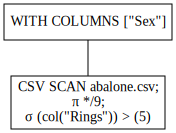

In [106]:
q.show_graph()

In [107]:
%%time

q.collect()

CPU times: user 800 ms, sys: 195 ms, total: 995 ms
Wall time: 550 ms


Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""m""",0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
"""m""",0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
"""f""",0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
"""m""",0.44,0.365,0.125,0.7985,0.2155,0.114,0.155,10
"""i""",0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7
"""i""",0.425,0.3,0.095,0.3515,0.141,0.0775,0.12,8
"""f""",0.53,0.415,0.15,0.7775,0.237,0.1415,0.33,20
"""f""",0.545,0.425,0.125,0.768,0.294,0.1495,0.26,16
"""m""",0.475,0.37,0.125,0.5095,0.2165,0.1125,0.165,9


In [108]:
%%time

q.collect(streaming=True)

CPU times: user 855 ms, sys: 38.5 ms, total: 893 ms
Wall time: 489 ms


Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
str,f64,f64,f64,f64,f64,f64,f64,i64
"""m""",0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
"""m""",0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
"""f""",0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
"""m""",0.44,0.365,0.125,0.7985,0.2155,0.114,0.155,10
"""i""",0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7
"""i""",0.425,0.3,0.095,0.3515,0.141,0.0775,0.12,8
"""f""",0.53,0.415,0.15,0.7775,0.237,0.1415,0.33,20
"""f""",0.545,0.425,0.125,0.768,0.294,0.1495,0.26,16
"""m""",0.475,0.37,0.125,0.5095,0.2165,0.1125,0.165,9


### Заключение по Polars и Pandas

**Нельзя сказать, что Polars во всех запросах сильно выигрывает у Pandas. Представленные выше выводы свидетельствуют об этом. В случае Polars lazy-API библиотека Polars явно уступает Pandas по времени работы.**

# Введение в машинное обучение (основные понятия)

Основные понятия.

В нашем примере мы можем попробовать предсказать стоимость алмаза по его характеристикам.

* алмазы - *объекты*
* характеристики - *признаки*
* стоимость - *целевая переменная*

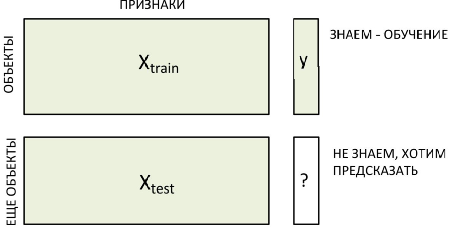

Модели машинного обучения - это некоторые математические правила (обычно функции), по которым модель делает прогноз.

**Пример (линейная регрессия):**

$price = a + b\cdot carat + c\cdot depth,$

здесь $a,b,c$ - параметры модели (заранее мы их не знаем).

*Параметры подбираются по обучающим данным так, чтобы модель ошибалась меньше всего.*

Пример плохо подобранных параметров $a, b$ модели
$$y = a + b\cdot x.$$

На рисунке
$$y = -30 + 7x.$$

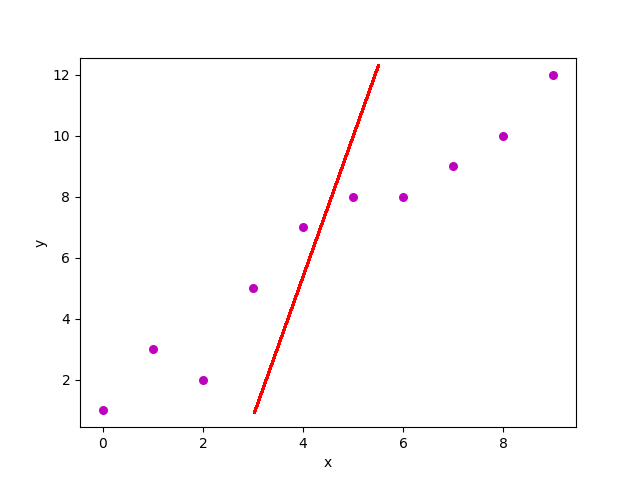

Пример хорошо подобранных параметров:
$$y = 0.5 + x.$$

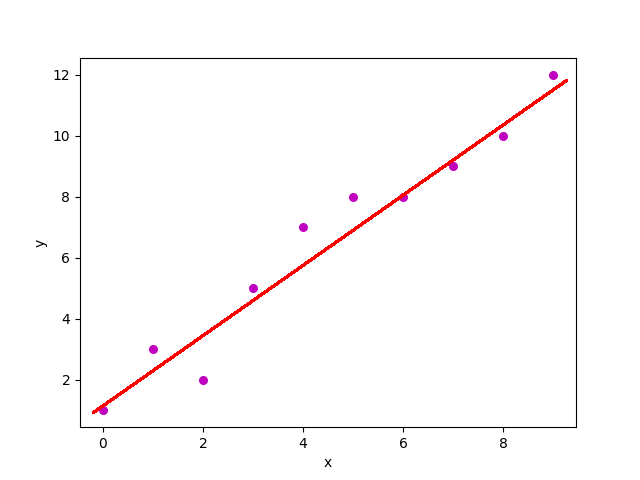

Функции для построения прогнозов бывают разные:

* линейные модели
* решающие правила (если $a$, то $b$)
* нейронные сети
* другие модели

Каждая модель хорошо работает в своих предположениях о данных, поэтому изучить распределение целевой переменной всегда очень полезно.

Обучим линейную регрессию предсказывать возраст моллюска по его длине.

In [109]:
X = df[['Length']]
y = df['Rings']

In [110]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)

pred = lr.predict(X)

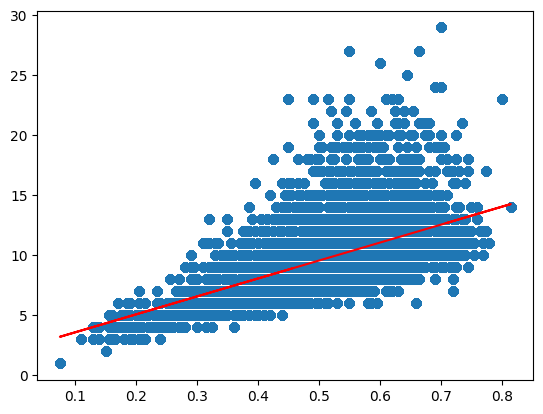

In [111]:
plt.scatter(X.values, y)
plt.plot(X.values, pred, c='red')

Вычислим ошибку модели

$$MAE = \frac1l\sum_{i=1}^l |a(x_i)-y_i|$$

In [112]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y, pred), np.mean(y)

(1.9518934619912656, 9.933684462532918)

## Анализ распределения столбцов (целевой переменной). Вариант модели №1.

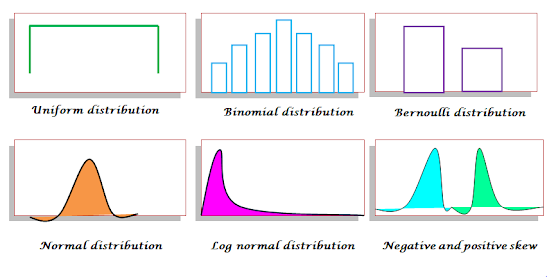

В основном в задачах регрессии мы ожидаем увидеть нормально распределенную целевую переменную. Многие модели заточены под нормальное распределение.

Но не только в этом дело...

<Axes: xlabel='Rings', ylabel='Count'>

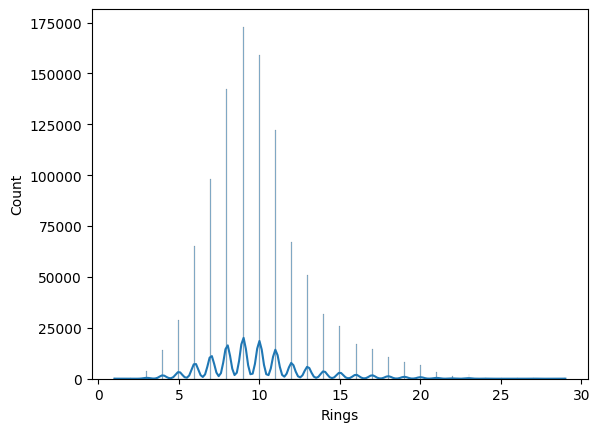

In [113]:
sns.histplot(data = df['Rings'], kde = True)

**ВЫВОД: Мы видим распределение похоже на нормальное, но есть небольшой хвост, который может быть связан с единичными выбросами, отмеченными в разделе Однофакторный анализ. Проверим это.**

*Возможно, что выбранная однопараметрическая модель должна быть дополнена некоторыми признаками, которые сильно коррелируют с целевой переменной.*

In [114]:
mean_absolute_error(y[y < 5], pred[y < 5])

1.500800861116591

In [115]:
mean_absolute_error(y[y >= 5], pred[y >= 5])

1.960029180359467

**ВЫВОД: Действительно, ошибка на возрастных моллюсках больше.**

In [116]:
X2 = df[['Shell weight']]
y2 = df['Rings']

lr = LinearRegression()
lr.fit(X2, y2)

LinearRegression()

In [117]:
pred_rings = lr.predict(X2)

mean_absolute_error(y2, pred_rings), np.mean(y2)

(1.8381507644109207, 9.933684462532918)

<Axes: xlabel='Rings', ylabel='Count'>

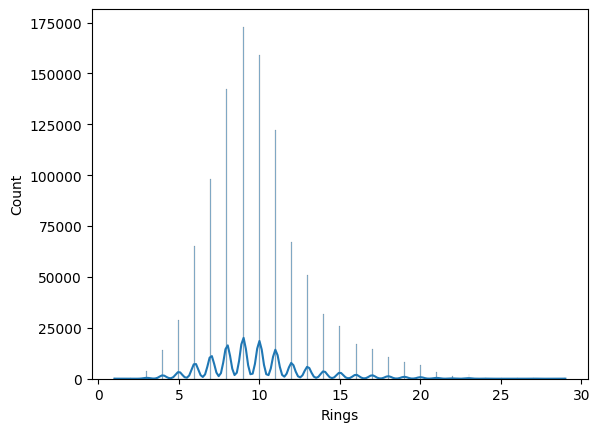

In [119]:
sns.histplot(df.Rings, kde = True)

In [122]:
len(y2[y2<5])/len(y2) # доля выборки

0.017716064160881013

In [123]:
mean_absolute_error(y2[y2<5], pred_rings[y2<5])

3.005419421012023

In [125]:
len(y2[(y2 >= 5)])/len(y2) # доля выборки

0.982283935839119

In [126]:
mean_absolute_error(y2[(y2 >= 5) ], pred_rings[(y2 >= 5)])

1.8170983928319582

**ВЫВОД: Возраст моллюсков до 5 лет предсказывается с большей ошибкой. Это может быть из-за того, что в модели мало признаков и доля выборки много меньше, чем моллюсков возраста от 5 лет.**

## Вариант модели №2

Будем решать задачу прогноза возраста моллюска по его параметру `whole weight`.

Обучаем линейную регрессию для решения этой задачи и выводим на экран ошибку MAE.

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048427 entries, 0 to 1048426
Data columns (total 9 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Sex             1048427 non-null  object 
 1   Length          1048427 non-null  float64
 2   Diameter        1048427 non-null  float64
 3   Height          1048427 non-null  float64
 4   Whole weight    1048427 non-null  float64
 5   Shucked weight  1048427 non-null  float64
 6   Viscera weight  1048427 non-null  float64
 7   Shell weight    1048427 non-null  float64
 8   Rings           1048427 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 72.0+ MB


In [128]:
# your code here
X3 = df[['Whole weight']]
y3 = df['Rings']

lr = LinearRegression()
lr.fit(X3, y3)

LinearRegression()

In [129]:
pred_rings_wweight = lr.predict(X3)

round(mean_absolute_error(y3, pred_rings_wweight),0), round(np.mean(y3),0)

(2.0, 10.0)

<Axes: xlabel='Rings', ylabel='Count'>

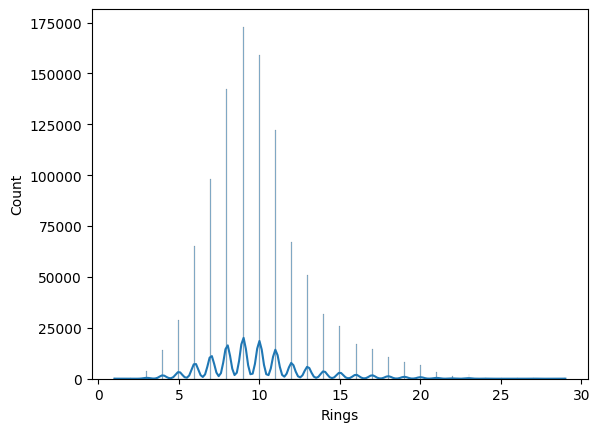

In [130]:
sns.histplot(df.Rings, kde=True)

<Axes: xlabel='Rings', ylabel='Count'>

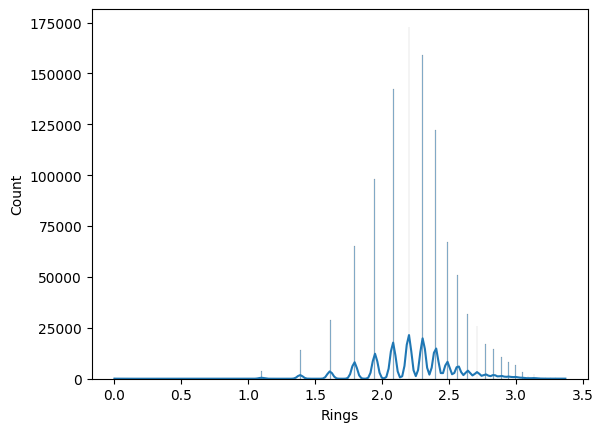

In [131]:
sns.histplot(data=np.log(df.Rings), kde=True)

## Анализ модели по варианту модель №2

Сколько процентов от среднего значения `Rings` составляет ошибка?

In [133]:
# среднее значение возраста моллюска
mean_rings_wweight=df.Rings.mean() #среднее значение price
print(round(mean_rings_wweight,0))

10.0


In [134]:
# ошибка предсказания
mae_rings_wweight=round(mean_absolute_error(y3, pred_rings_wweight),0)
print(round(mae_rings_wweight,0))

2.0


In [135]:
# доля ошибки
round(mae_rings_wweight/mean_rings_wweight*100,0)

20.0

**ВЫВОД: В случае предсказания возраста моллюска по признаку 'Whole Weight' доля ошибки модели составляет 20%. Это может быть из-за того, что в модели мало признаков, от которых зависит возраст моллюска помимо выбранного признака 'Whole Weight'.**

## Анализ модели по варианту модель №2. Продолжение.

Вычислите ошибку MAE для моллюсков с возрастом до 5 и с 5 лет отдельно:

* `Rings` < 5
* `Rings` >= 5

Какая из ошибок больше?

Выводы?

In [136]:
len(y3[y3<5])/len(y3) # доля выборки

0.017716064160881013

In [137]:
round(mean_absolute_error(y3[y3<5], pred_rings_wweight[y3<5]),0)

3.0

In [138]:
len(y3[(y3 >= 5)])/len(y3) # доля выборки

0.982283935839119

In [139]:
mean_absolute_error(y3[(y3 >= 5)], pred_rings_wweight[(y3 >= 5)])

1.9747528022688279

**ВЫВОД: В случае предсказания возраста моллюска по признаку 'Whole Weight' доля ошибки модели больше для моллюсков возрастом до 5 лет - MAE=3.0. Для моллюсков в возрасте от 5 лет ошибка MAE=1.97. Это может быть из-за того, что в модели мало признаков, от которых зависит возраст моллюска помимо выбранного признака 'Whole Weight'.**